# Genetic algorithm

In [ ]:
# Imports
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
from qiskit.quantum_info import SparsePauliOp
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzes as anz
from src import mitigation as mit

## Observable and ansatz

We Know $Z_1\otimes Z_2$ exhibits a BP with deep anstaz.

In [2]:
Z1Z2_obs = SparsePauliOp.from_list([("ZZ", 1)])

### Minimization process with AG

c:\Users\juanl\miniconda3\envs\qml_avoiding_bp\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\juanl\miniconda3\envs\qml_avoiding_bp\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


{'minimum_value': -0.9993733151935972, 'optimal_parameters': [2.318546119038947, 3.4213438370226883, 4.5568644115957335, -0.5938814969302516, 1.723620086666695, 3.409726467149392, 5.994658946680107, 0.0808582627846889], 'n_evaluations': 1004, 'n_generations': 73, 'cost_history': [-0.7714102519748484, -0.7448673089601423, -0.7448673089601423, -0.7688349640975481, -0.7688349640975481, -0.7986993164461981, -0.8164263210992617, -0.8187597899412488, -0.8383329110380824, -0.8576767323077015, -0.8682709989821877, -0.8835890321688226, -0.8868865505497158, -0.9199174575006858, -0.9199174575006858, -0.9159688908671119, -0.9233476768412467, -0.9410745009301843, -0.940572219765324, -0.9658341698363716, -0.9641894506484249, -0.956943532877175, -0.9793018279228597, -0.9793018279228597, -0.9774691931348477, -0.9774691931348477, -0.9820287885578352, -0.9823478130377579, -0.9823478130377579, -0.9838502231614443, -0.9838502231614443, -0.9888163396580327, -0.9876993942966776, -0.9876993942966776, -0.9909

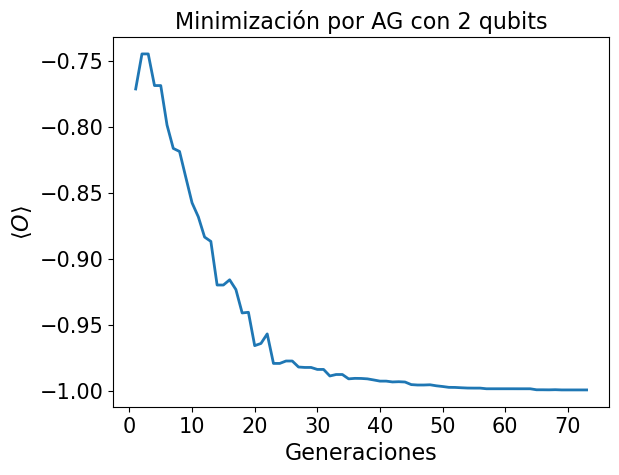

{'minimum_value': -0.9053673499286219, 'optimal_parameters': [4.722175087420333, 5.023846386424397, 0.15397854568404754, 2.2721597105391815, 5.347040206020524, 5.132005826310453, 1.5610085750388023, 4.954361114489517, 0.5467336177248421, 3.9101093499743933, 1.1324304982782136, 4.814160421668745, 4.849528972612074, 1.0013353627424526, 1.2858804525569107, 2.7133715187384917, 3.3830197787728773, 3.91601359522945, 1.9147598116413393, 0.8654798032373839, 1.5582967944972455, 1.7153076986290798, 4.233564895800061, 5.820149293097901, 0.2909978363536146, 5.464711520700432, 5.99261214106293, 3.5793987130472997, 4.081222452919448, 5.089493568949042, 2.1899211917244563, 6.13898105045468], 'n_evaluations': 215, 'n_generations': 14, 'cost_history': [-0.592027029923304, -0.6218102852416922, -0.6616922551828719, -0.8232014158897956, -0.7907184300410018, -0.79864473389231, -0.8451901630970355, -0.8515087202753444, -0.8687740808217341, -0.8740205465769767, -0.8883702762201277, -0.8809227988922733, -0.90

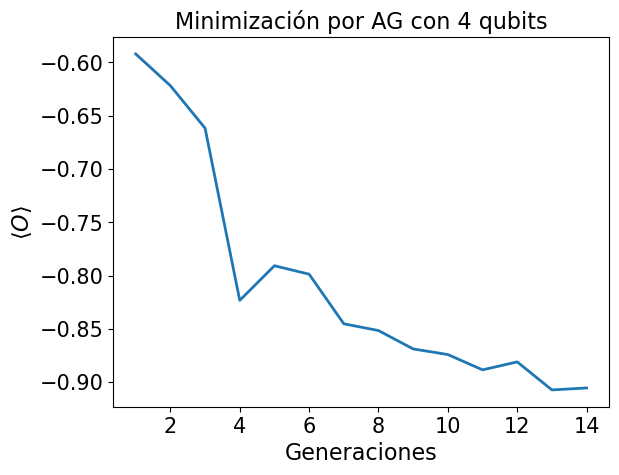

{'minimum_value': -0.978190298594168, 'optimal_parameters': [4.317522816214558, 2.685309940012082, 0.07344996485172699, 0.08492773858352222, 0.530747346611466, 0.7247675886268081, 2.0946721371249115, 4.509465130352984, 1.0636610694722974, 3.7776108025660213, 5.9866552981000645, 1.5230393572802017, 6.106365831137463, 0.1760273777871051, 1.8857789392975062, 2.4367659553460204, 3.054876808636998, 4.457202125046524, 1.157398847588485, 1.698610141774229, 2.6673772265701765, 2.1407371053053423, 3.6201550873423938, 1.5049064870015316, 1.7056989994861458, 5.033190197504009, 0.9140584923175846, 4.061005713483289, 2.6363381990385983, 2.342392519298484, 3.801496452834178, 0.2765441545239037, 4.69716137261452, 5.106874913095166, 2.6948551090640964, 4.232436972894414, 2.116206600873096, 1.795482234896981, 1.7443172582307116, 2.2886199874246267, 1.4128422673855516, 2.038717512047742, 2.188449952838397, 5.952102004588109, 1.9247634884727636, 0.742912118937263, 3.8166167055938915, 2.833050328070435, 3

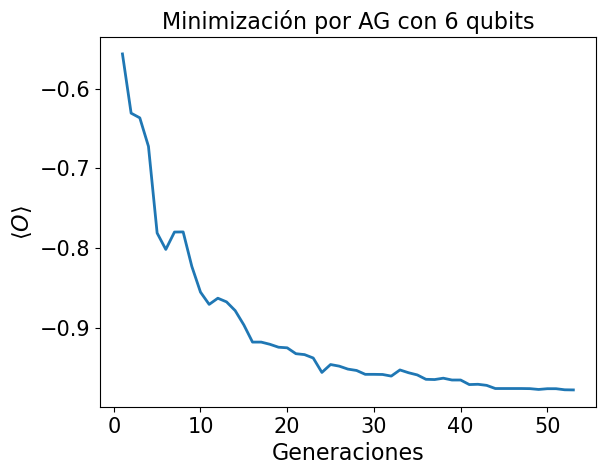

KeyboardInterrupt: 

In [42]:
# Convergencia Para distino N qubits
for n_qubits in range(2, 11, 2):

    expanded_obs = cf.expand_observable(Z1Z2_obs, n_qubits)

    minimization_data = mit.VQE_minimization_AG(anz.build_deep_ansatz(n_qubits, 2)[0], expanded_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=15, max_gen=100, print_info=False, plot_info=False)

    print(minimization_data)

    plt.plot(range(1, minimization_data["n_generations"]+1), minimization_data["cost_history"], label=r"$\langle O\rangle$", linewidth=2)

    plt.xlabel(r"Generaciones", size=16)
    plt.ylabel(r"$\langle O\rangle$", size=16)
    plt.title(rf"Minimización por AG con {n_qubits} qubits", size=16)
    plt.xticks(fontsize="15")
    plt.yticks(fontsize="15")

    plt.show()

Convergence and not convergence executions

{'minimum_value': -0.9538182654088844, 'optimal_parameters': [3.8229265282420895, 5.748137523449096, 3.8512039198284578, 5.902764991447859, 1.57502772298984, 0.5721467431867007, 0.6521641633841292, 2.0059676277666907, 5.454666987250757, 5.312698421881711, 2.7670254260476606, 5.8995061890617055, 3.724322281720493, 1.0988480025491896, 4.623415031243198, 3.233900040796847, 3.939733539190072, 3.6137837202558685, 6.333880533355522, 1.6670871233806248, 2.1989434482063155, 1.9865574983331773, 5.722972521259379, 4.09793565127072, 5.678687677977998, 0.9252406715952157, 5.841305393197893, 2.73181954172689, 2.513947343876844, 6.480461732662538, 3.9757299263702475, 0.8550233920593757], 'n_evaluations': 537, 'n_generations': 38, 'cost_history': [-0.6964137917620741, -0.6967763008296937, -0.6630168449545443, -0.5904383057352183, -0.6309242828552613, -0.6309242828552613, -0.6676351531013528, -0.7151466555984938, -0.6839279061969202, -0.6857576216147979, -0.7364585433043709, -0.7364585433043709, -0.74

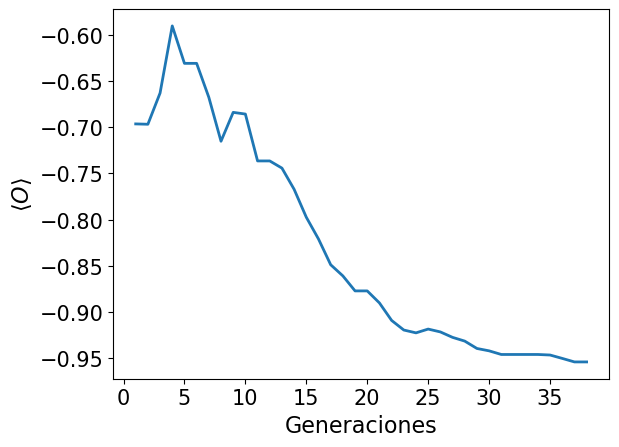

{'minimum_value': -0.9960057512206394, 'optimal_parameters': [0.17069839810691118, 0.7348354417709206, 4.028349701145523, 3.7036645625922184, 1.9901978953835264, 4.6447067561827495, 4.060949132914885, 1.0610951911652677, 1.456542007189034, 1.0089783682855582, 3.633348450049472, 6.124392695668327, 3.4104526459205715, 5.277132686287071, 3.2617758246038946, 0.0761040848807294, 0.7268383698962444, 5.296724197518256, 1.6725273385688357, 1.038286586013763, 3.083523597975674, 3.1558366563140945, 5.025690781724711, 1.108592200797233, 3.375078224716192, 5.0992512784392, 3.3087992994128532, 2.4059845700814306, 4.004168971599338, 5.757331939274344, 5.968616839857253, 3.667518496603229], 'n_evaluations': 1144, 'n_generations': 83, 'cost_history': [-0.7559918440032366, -0.5411861381604964, -0.52275657500086, -0.5569474796033927, -0.5646969148256705, -0.6200836963753129, -0.6047175218802034, -0.616448669698487, -0.6543864414871248, -0.6605749789357866, -0.675461314667012, -0.738406680034789, -0.7478

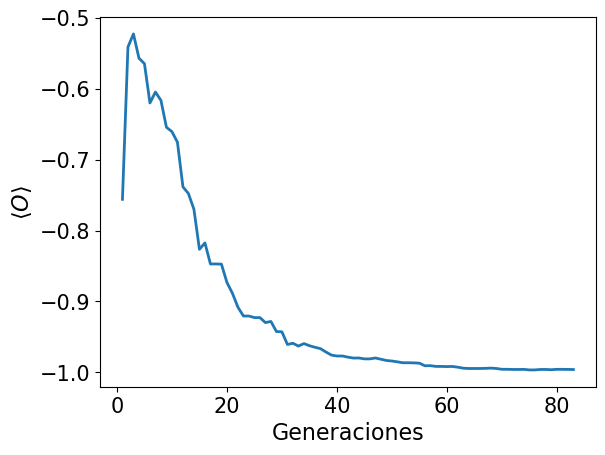

In [ ]:
n_qubits = 4

expanded_obs = cf.expand_observable(Z1Z2_obs, n_qubits)

minimization_data = mit.VQE_minimization_AG(anz.build_deep_ansatz(n_qubits, 2)[0], expanded_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=15, max_gen=100, print_info=False, plot_info=False)

print(minimization_data)

plt.plot(range(1, minimization_data["n_generations"]+1), minimization_data["cost_history"], label=r"$\langle O\rangle$", linewidth=2)

plt.xlabel(r"Generaciones", size=16)
plt.ylabel(r"$\langle O\rangle$", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")

plt.show()


expanded_obs = cf.expand_observable(Z1Z2_obs, n_qubits)

minimization_data = mit.VQE_minimization_AG(anz.build_deep_ansatz(n_qubits, 2)[0], expanded_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=15, max_gen=100, print_info=False, plot_info=False)

print(minimization_data)

plt.plot(range(1, minimization_data["n_generations"]+1), minimization_data["cost_history"], label=r"$\langle O\rangle$", linewidth=2)

plt.xlabel(r"Generaciones", size=16)
plt.ylabel(r"$\langle O\rangle$", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")

plt.show()

## GA vs COBYLA

Here in the notbook we present the programs used to get the data, but only for 2 qubits. To get all data, one must execute the script `ag_vs_cobyla.py`. As it takes so much time to calculate all data, it was executed on a VM at a cloud service, running on 4 Ampere A1 cores with 24 GB of RAM. 

### GA performance distributions

Population of 5

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Población a usar en este experimento
pop = 5

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)
minimums_exp = np.zeros(n_experiments)


for iter in range(n_experiments):

    t0 = time.time()
    data = mit.VQE_minimization_AG(anz.build_deep_ansatz(2,2)[0], Z1Z2_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_gen=1000, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data["n_generations"]
    evaluations_exp[iter] = data["n_evaluations"]
    time_exp[iter] = t1-t0
    minimums_exp[iter] = data["minimum_value"]

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp, minimums_exp))
np.savetxt(f"data/genetic/data_GA_2qubits_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

Population of 10

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Población a usar en este experimento
pop = 10

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)
minimums_exp = np.zeros(n_experiments)


for iter in range(n_experiments):

    t0 = time.time()
    data = mit.VQE_minimization_AG(anz.build_deep_ansatz(2,2)[0], Z1Z2_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_gen=1000, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data["n_generations"]
    evaluations_exp[iter] = data["n_evaluations"]
    time_exp[iter] = t1-t0
    minimums_exp[iter] = data["minimum_value"]

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp, minimums_exp))
np.savetxt(f"data/genetic/data_GA_2qubits_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

Only COBYLA

In [57]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Guardare los datos de los experimentos
generations_exp = np.zeros(n_experiments)
evaluations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)
minimums_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    t0 = time.time()

    data = mit.VQE_minimization(anz.build_deep_ansatz(2, 2)[0], Z1Z2_obs, initial_guess="rand", tol=0.0001)

    t1 = time.time()
    evaluations_exp[iter] = data["iters"]
    time_exp[iter] = t1-t0
    minimums_exp[iter] = data["cost_history"][-1]

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp, minimums_exp))
np.savetxt(f"data/genetic/data_COBYLA_2qubits.csv", array_to_save, fmt="%f", delimiter=",")

Experiment 0 terminated with 112.0 evaluations.
Experiment 1 terminated with 643.0 evaluations.
Experiment 2 terminated with 132.0 evaluations.
Experiment 3 terminated with 115.0 evaluations.
Experiment 4 terminated with 205.0 evaluations.
Experiment 5 terminated with 1383.0 evaluations.
Experiment 6 terminated with 154.0 evaluations.
Experiment 7 terminated with 127.0 evaluations.
Experiment 8 terminated with 122.0 evaluations.
Experiment 9 terminated with 271.0 evaluations.
Experiment 10 terminated with 830.0 evaluations.
Experiment 11 terminated with 145.0 evaluations.
Experiment 12 terminated with 249.0 evaluations.
Experiment 13 terminated with 132.0 evaluations.
Experiment 14 terminated with 124.0 evaluations.
Experiment 15 terminated with 180.0 evaluations.
Experiment 16 terminated with 137.0 evaluations.
Experiment 17 terminated with 127.0 evaluations.
Experiment 18 terminated with 114.0 evaluations.
Experiment 19 terminated with 665.0 evaluations.
Experiment 20 terminated with

Plots

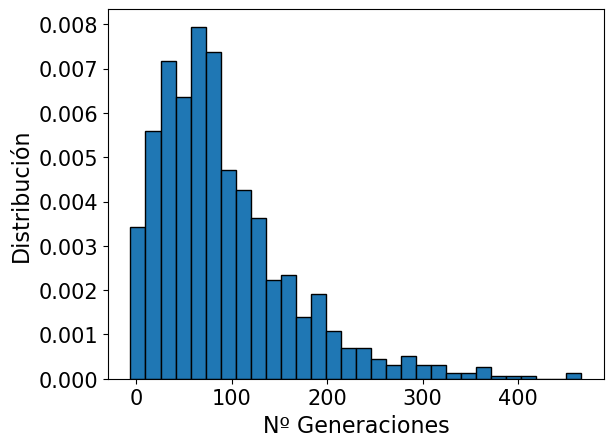

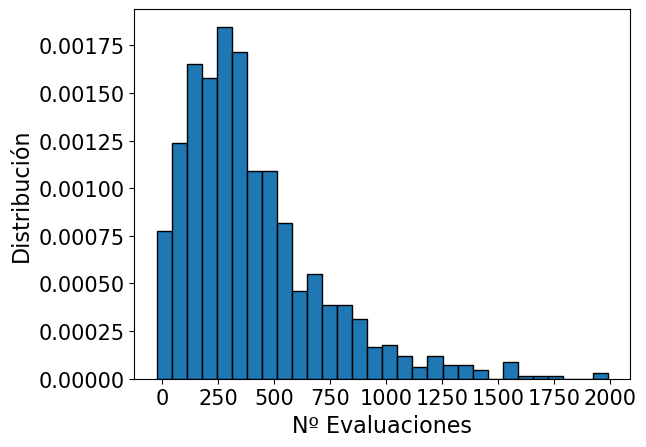

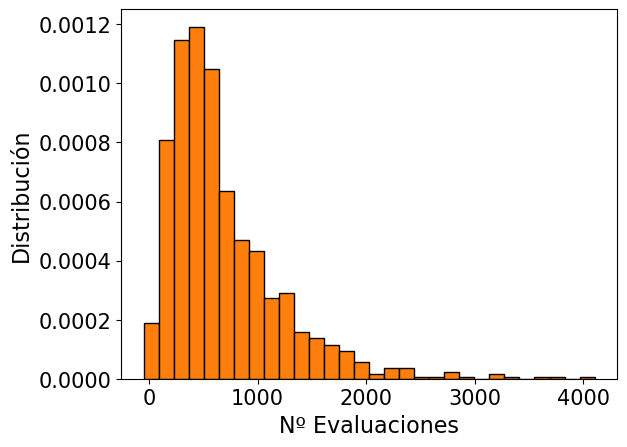

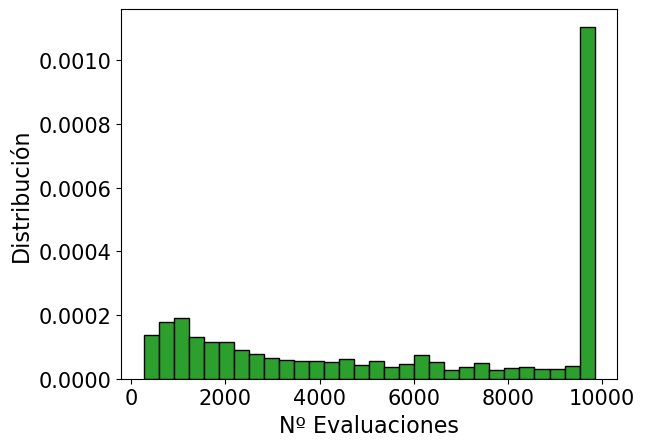

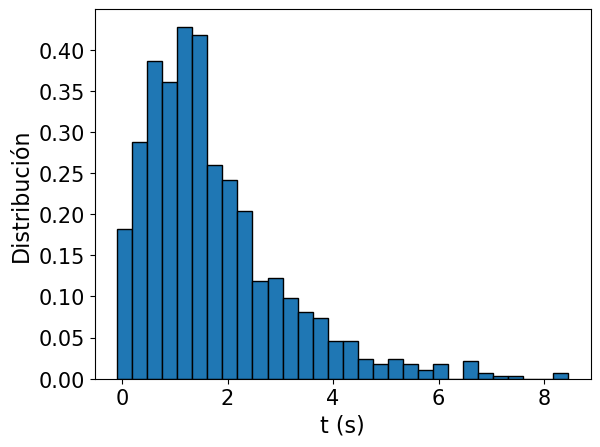

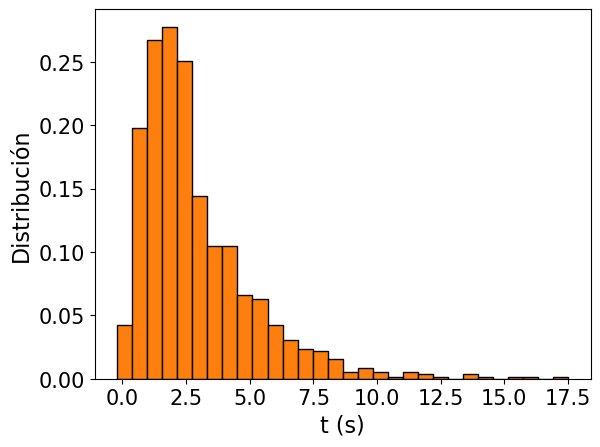

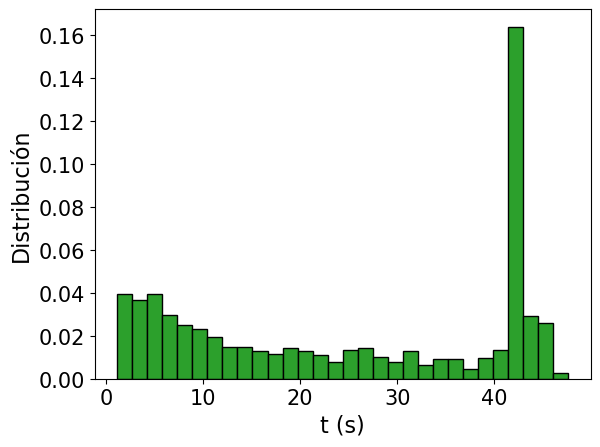

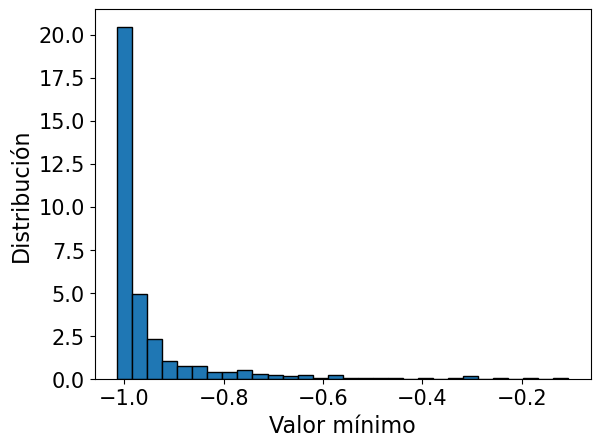

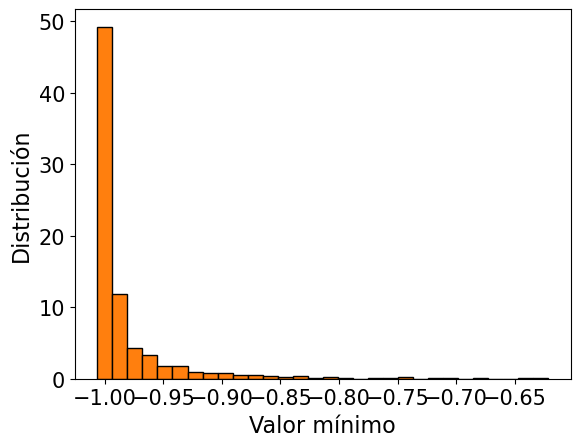

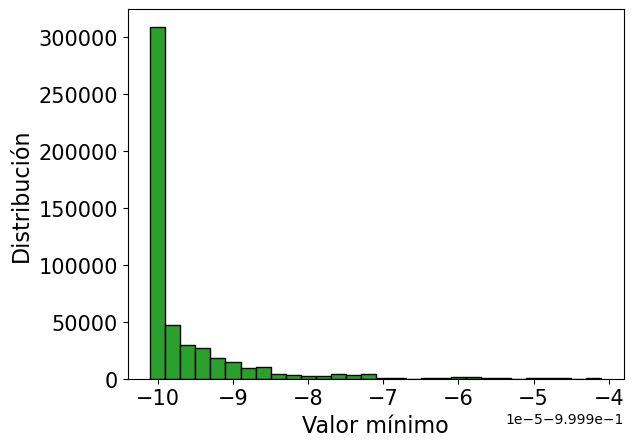

In [ ]:
#Func to plot distributions as histograms

def plot_distrib(data : np.ndarray, n_bars : int, label : str, color = "#1f77b4"):
    hist = np.histogram(data, n_bars, density=True)
    max_value = np.max(data)
    min_value = np.min(data)
    x_data = hist[1][:-1]
    y_data = hist[0]
    plt.bar(x_data, y_data, (max_value-min_value)/n_bars, edgecolor="black", align="center", color=color)

    plt.ylabel("Distribución", size=16)
    plt.xlabel(label, size=16)
    plt.xticks(fontsize="15")
    plt.yticks(fontsize="15")
    plt.show()

n_qubits = 4

# Cargo los datos
AG_loaded_data_5 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_5.csv", delimiter=",")
AG_loaded_data_10 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_10.csv", delimiter=",")
COBYLA_loaded_data = np.loadtxt(f"data/genetic/data_COBYLA_{n_qubits}qubits.csv", delimiter=",")

# Generations dist
plot_distrib(AG_loaded_data_5[:, 0], 30, "Nº Generaciones")

# Comparison plots
plot_distrib(AG_loaded_data_5[:, 1], 30, "Nº Evaluaciones")
plot_distrib(AG_loaded_data_10[:, 1], 30, "Nº Evaluaciones", color="#ff7f0e")
plot_distrib(COBYLA_loaded_data[:, 1], 30, "Nº Evaluaciones", color="#2ca02c")

plot_distrib(AG_loaded_data_5[:, 2], 30, "t (s)")
plot_distrib(AG_loaded_data_10[:, 2], 30, "t (s)", color="#ff7f0e")
plot_distrib(COBYLA_loaded_data[:, 2], 30, "t (s)", color="#2ca02c")

plot_distrib(AG_loaded_data_5[:, 3], 30, "Valor mínimo")
plot_distrib(AG_loaded_data_10[:, 3], 30, "Valor mínimo", color="#ff7f0e")
plot_distrib(COBYLA_loaded_data[:, 3], 30, "Valor mínimo", color="#2ca02c")

### Expectated evaluations until convergence

In [2]:
for n_qubits in range(2, 8):

    # Cargo los datos
    AG_loaded_data_5 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_5.csv", delimiter=",")
    AG_loaded_data_10 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_10.csv", delimiter=",")
    COBYLA_loaded_data = np.loadtxt(f"data/genetic/data_COBYLA_{n_qubits}qubits.csv", delimiter=",")
    
    print(f"\n Valores medios para {n_qubits} qubits:")
    print("AG pop=5:", np.mean(AG_loaded_data_5[:, 1]))
    print("AG pop=10:", np.mean(AG_loaded_data_10[:, 1]))
    print("COBYLA:", np.mean(COBYLA_loaded_data[:, 1]))


 Valores medios para 2 qubits:
AG pop=5: 256.267
AG pop=10: 512.672
COBYLA: 250.86

 Valores medios para 3 qubits:
AG pop=5: 367.803
AG pop=10: 616.839
COBYLA: 1835.627

 Valores medios para 4 qubits:
AG pop=5: 433.237
AG pop=10: 748.851
COBYLA: 5909.845

 Valores medios para 5 qubits:
AG pop=5: 531.781
AG pop=10: 849.399
COBYLA: 8304.04

 Valores medios para 6 qubits:
AG pop=5: 551.139
AG pop=10: 924.913
COBYLA: 9638.126

 Valores medios para 7 qubits:
AG pop=5: 665.068
AG pop=10: 993.428
COBYLA: 9940.193


### Mean minimum value

In [3]:
for n_qubits in range(2, 8):

    # Cargo los datos
    AG_loaded_data_5 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_5.csv", delimiter=",")
    AG_loaded_data_10 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_10.csv", delimiter=",")
    COBYLA_loaded_data = np.loadtxt(f"data/genetic/data_COBYLA_{n_qubits}qubits.csv", delimiter=",")
    
    print(f"\n Valores medios para {n_qubits} qubits:")
    print("AG pop=5:", np.mean(AG_loaded_data_5[:, 3]))
    print("AG pop=10:", np.mean(AG_loaded_data_10[:, 3]))
    print("COBYLA:", np.mean(COBYLA_loaded_data[:, 3]))


 Valores medios para 2 qubits:
AG pop=5: -0.951428419
AG pop=10: -0.978387518
COBYLA: -0.994402462

 Valores medios para 3 qubits:
AG pop=5: -0.9530956209999999
AG pop=10: -0.979479421
COBYLA: -0.9990363440000001

 Valores medios para 4 qubits:
AG pop=5: -0.9403820330000001
AG pop=10: -0.9764490140000001
COBYLA: -0.999995892

 Valores medios para 5 qubits:
AG pop=5: -0.938577327
AG pop=10: -0.970372759
COBYLA: -0.99998416

 Valores medios para 6 qubits:
AG pop=5: -0.92931374
AG pop=10: -0.9622138600000001
COBYLA: -0.9999511479999998

 Valores medios para 7 qubits:
AG pop=5: -0.92423893
AG pop=10: -0.9513269090000002
COBYLA: -0.999880826


### Accumulated probability of convergence given the iterations

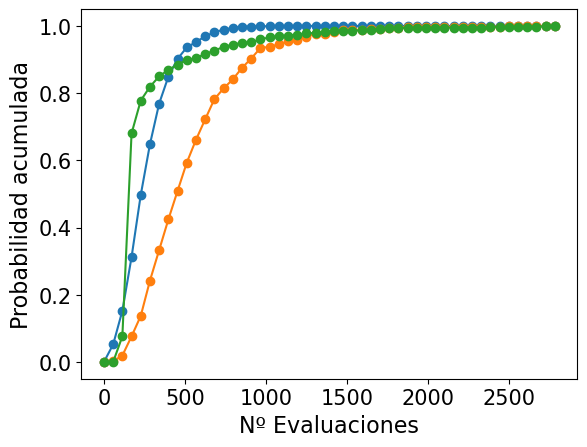

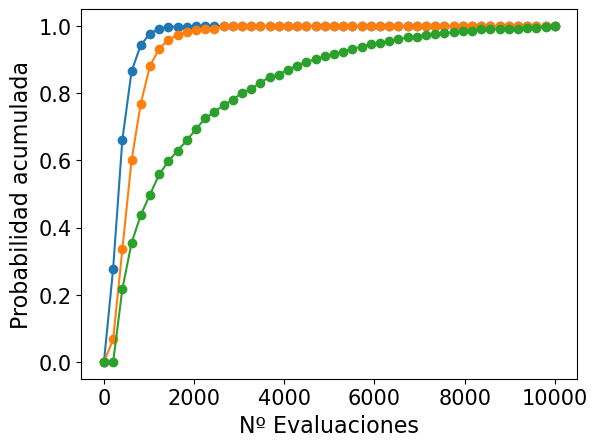

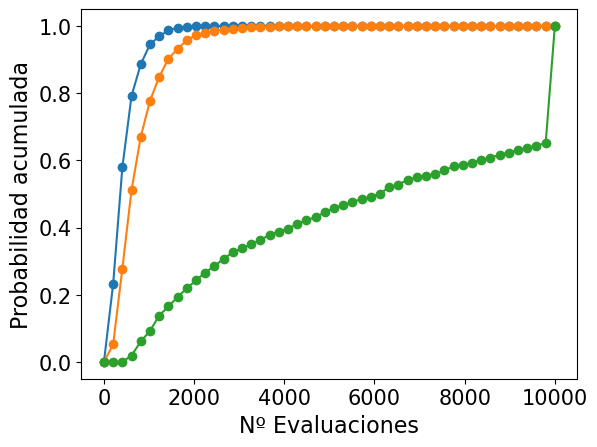

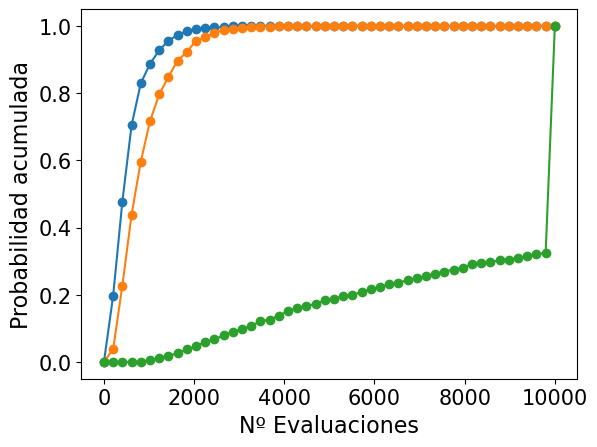

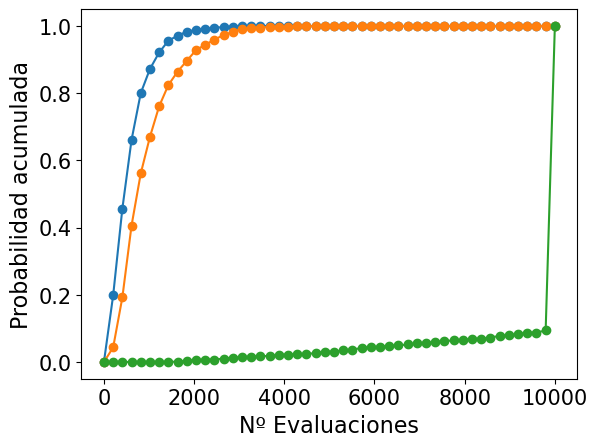

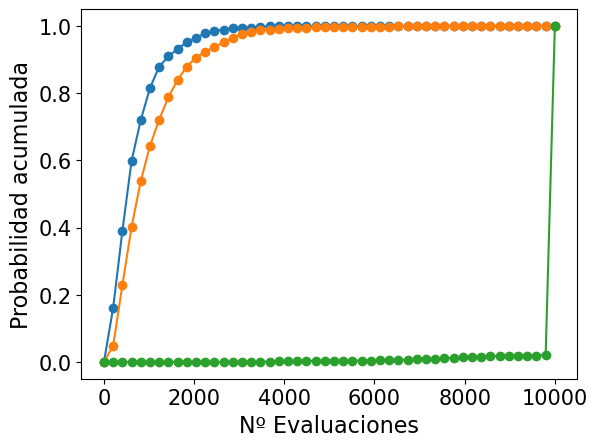

In [4]:
def plot_probs(datas : list, x_values : list, labels : list):

    n_experiments = len(datas)

    amounts = [[] for i in range(n_experiments)]

    for exp in range(n_experiments):

        for x_limit in x_values:

            amounts[exp].append(np.count_nonzero(datas[exp] <= x_limit)/len(datas[exp]))

        plt.plot(x_values, amounts[exp], marker="o", label = labels[exp])
        plt.ylabel("Probabilidad acumulada", size=16)
        plt.xlabel("Nº Evaluaciones", size=16)
        plt.xticks(fontsize="15")
        plt.yticks(fontsize="15")
        
    #plt.legend(fontsize="15")
    plt.show()


for n_qubits in range(2, 8):

    # Cargo los datos
    AG_loaded_data_5 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_5.csv", delimiter=",")
    AG_loaded_data_10 = np.loadtxt(f"data/genetic/data_GA_{n_qubits}qubits_10.csv", delimiter=",")
    COBYLA_loaded_data = np.loadtxt(f"data/genetic/data_COBYLA_{n_qubits}qubits.csv", delimiter=",")
    plot_probs([AG_loaded_data_5[:, 1], AG_loaded_data_10[:, 1], COBYLA_loaded_data[:, 1]], np.linspace(0, int(np.max(COBYLA_loaded_data[:, 1])), 50), ["AG pop=5", "AG pop=10", "COBYLA"])
